In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [7]:
!pip install datasets

In [8]:
from datasets import load_dataset, get_dataset_split_names

get_dataset_split_names("Az-r-ow/chest_xray")
X_train = load_dataset("Az-r-ow/chest_xray", split="train")
X_test = load_dataset("Az-r-ow/chest_xray", split="test")
X_val = load_dataset("Az-r-ow/chest_xray", split="validation")

<Axes: xlabel='count'>

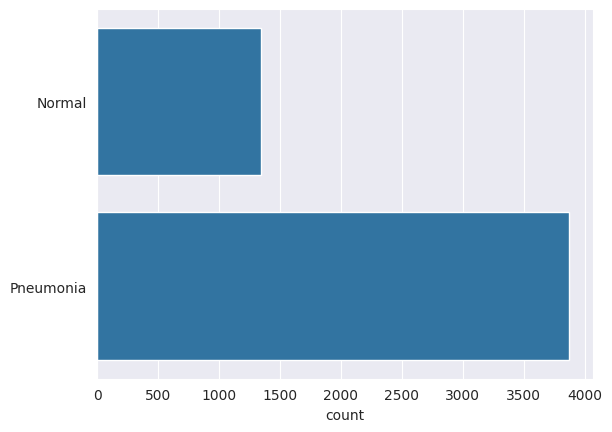

In [13]:
l = []
for i in X_train:
  if(i['label'] == 1):
    l.append("Pneumonia")
  else:
    l.append("Normal")

sns.set_style('darkgrid')
sns.countplot(l)

Dataset({
    features: ['image', 'label'],
    num_rows: 5216
})